# <font color=green>Auto MPG Data Set</font>

In [139]:
import pandas as pd
import numpy as np
from numpy import percentile
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [140]:
input_path="/Users/sayarsamanta/Documents/GitHub/Data-Science-Projects/Auto MPG Data Set/Data/Input/"
intermediate_path="/Users/sayarsamanta/Documents/GitHub/Data-Science-Projects/Auto MPG Data Set/Data/Intermediate/"
output_path="/Users/sayarsamanta/Documents/GitHub/Data-Science-Projects/Auto MPG Data Set/Data /Output/"

In [141]:
data = pd.read_csv(input_path+"auto-mpg.csv")

In [142]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [143]:
data.shape

(398, 9)

In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [145]:
data.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [146]:
#checking for null values
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

/Volumes/Samsung_T5/Anaconda/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mpg', ylabel='Density'>

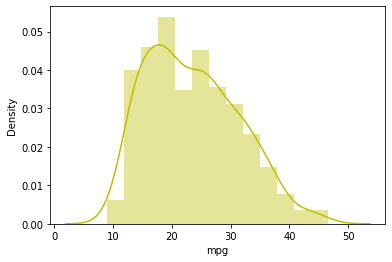

In [147]:
#checking the distribution of predicted variable which is MPG
sns.distplot(data['mpg'],color='y')

In [148]:
data.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [149]:
data = data[data.horsepower != '?']

In [150]:
data['horsepower'] = pd.to_numeric(data['horsepower'])

<AxesSubplot:xlabel='horsepower'>

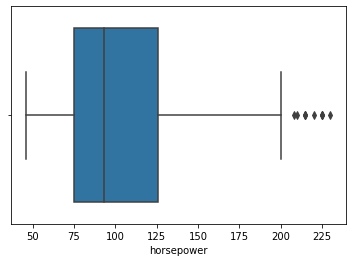

In [151]:
#checking outlier
sns.boxplot(x=data['horsepower'])

In [155]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [156]:
l,u = outlier_treatment(data.horsepower)

In [157]:
data.drop(data[ (data.horsepower > u) | (data.horsepower < l) ].index , inplace=True)

<AxesSubplot:xlabel='horsepower'>

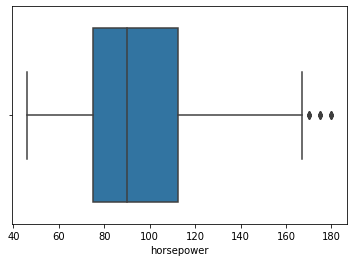

In [158]:
#checking outlier
sns.boxplot(x=data['horsepower'])

<AxesSubplot:xlabel='cylinders'>

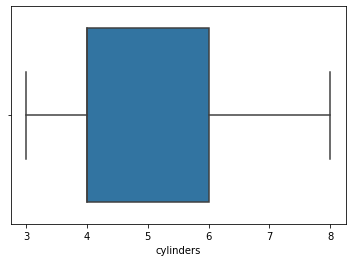

In [159]:
#checking outlier
sns.boxplot(x=data['cylinders'])

<AxesSubplot:xlabel='displacement'>

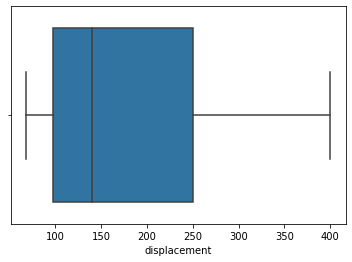

In [160]:
#checking outlier
sns.boxplot(x=data['displacement'])

<AxesSubplot:xlabel='weight'>

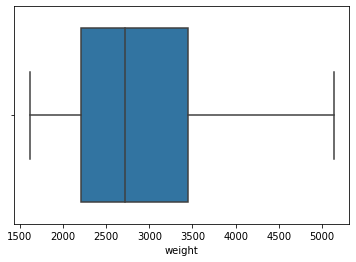

In [161]:
#checking outlier
sns.boxplot(x=data['weight'])

<AxesSubplot:xlabel='acceleration'>

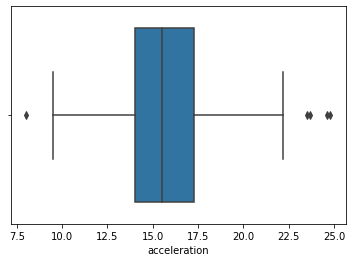

In [162]:
#checking outlier
sns.boxplot(x=data['acceleration'])

In [163]:
l,u = outlier_treatment(data.acceleration)

In [164]:
data.drop(data[ (data.acceleration > u) | (data.acceleration < l) ].index , inplace=True)

<AxesSubplot:xlabel='acceleration'>

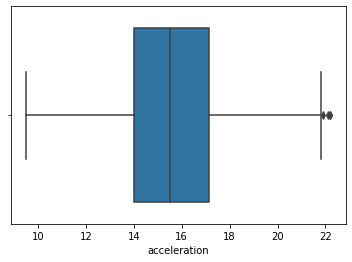

In [165]:
#checking outlier
sns.boxplot(x=data['acceleration'])

<AxesSubplot:xlabel='origin'>

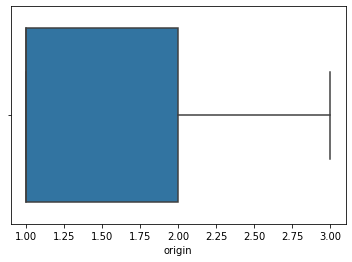

In [166]:
#checking outlier
sns.boxplot(x=data['origin'])

<AxesSubplot:xlabel='model year'>

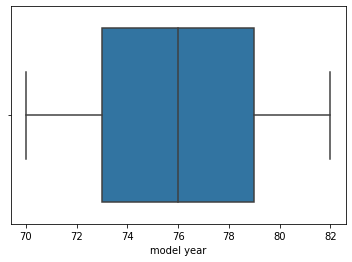

In [167]:
#checking outlier
sns.boxplot(x=data['model year'])